In [2]:
import awkward as ak
import pathlib
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
#from codes.plotting import plot_prettier 
#plot_prettier()

In [106]:
data1 = ak.from_json(pathlib.Path(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\v0_noBIB_0-50.json"))
data = ak.from_json(pathlib.Path(r"C:\Users\leoro\OneDrive\Muon_Collider\Psets\mucol_plotting_scripts-main\macros\local_scripts\makeMuonPlots.json"))

In [63]:
data

<Record {mcp_pt: [[31.5], ...], ...} type='{mcp_pt: var * var * float64, mc...'>

In [65]:
mcp_pt = data1['mcp_pt']
mcp_eta = data1['mcp_eta']
mcp_phi = data1['mcp_phi']
pfo_pt = data1['pfo_pt']
pfo_eta = data1['pfo_eta']
pfo_phi = data1['pfo_phi']
pfo_mu_pt = data1['pfo_mu_pt']
pfo_mu_eta = data1['pfo_mu_eta']
pfo_mu_phi = data1['pfo_mu_phi']
mcp_mu_pt = data1['mcp_mu_pt']
mcp_mu_eta = data1['mcp_mu_eta']
mcp_mu_phi = data1['mcp_mu_phi']
mcp_mu_match_pt = data1['mcp_mu_match_pt']
mcp_mu_match_eta = data1['mcp_mu_match_eta']
mcp_mu_match_phi = data1['mcp_mu_match_phi']
d_mu_dpt = data1['d_mu_dpt']
d_mu_drelpt = data1['d_mu_drelpt']
d_mu_dphi = data1['d_mu_dphi']
d_mu_deta = data1['d_mu_deta']
nhits = data1['nhits']
pt_res_hits = data1['pt_res_hits']
# pt_res_vs_eta = data1['pt_res_vs_eta']
# pt_res_vs_pt = data1['pt_res_vs_pt']
# d0_res_vs_pt = data1['d0_res_vs_pt']
# d0_res_vs_eta = data1['d0_res_vs_eta']
# z0_res_vs_pt = data1['z0_res_vs_pt']
# z0_res_vs_eta = data1['z0_res_vs_eta']
d0_res = data1['d0_res']
z0_res = data1['z0_res']
pt_res = data1['pt_res'] 
pt_match = data1['pt_match']
eta_match = data1['eta_match']
ndf = data1['ndf']
chi2 = data1['chi2']
d0_res_match = data1['d0_res_match']
z0_res_match = data1['z0_res_match']
h2d_relpt = data1['h_2d_relpt']

In [75]:
theta_match = 2 * np.arctan(np.exp(-eta_match))
print(eta_match)
print(theta_match)
#theta_match = [[math.degrees(angle) for angle in sublist] for sublist in theta_match]
theta_match = np.degrees(theta_match)
print(np.min(pt_match))

[[0.251], [-1.72], [0.683], [0.81], ..., [0.895], [-0.852], [1.69], [0.656]]
[[1.32], [2.79], [0.936], [0.837], ..., [0.776], [2.34], [0.365], [0.957]]
0.5447990487125641


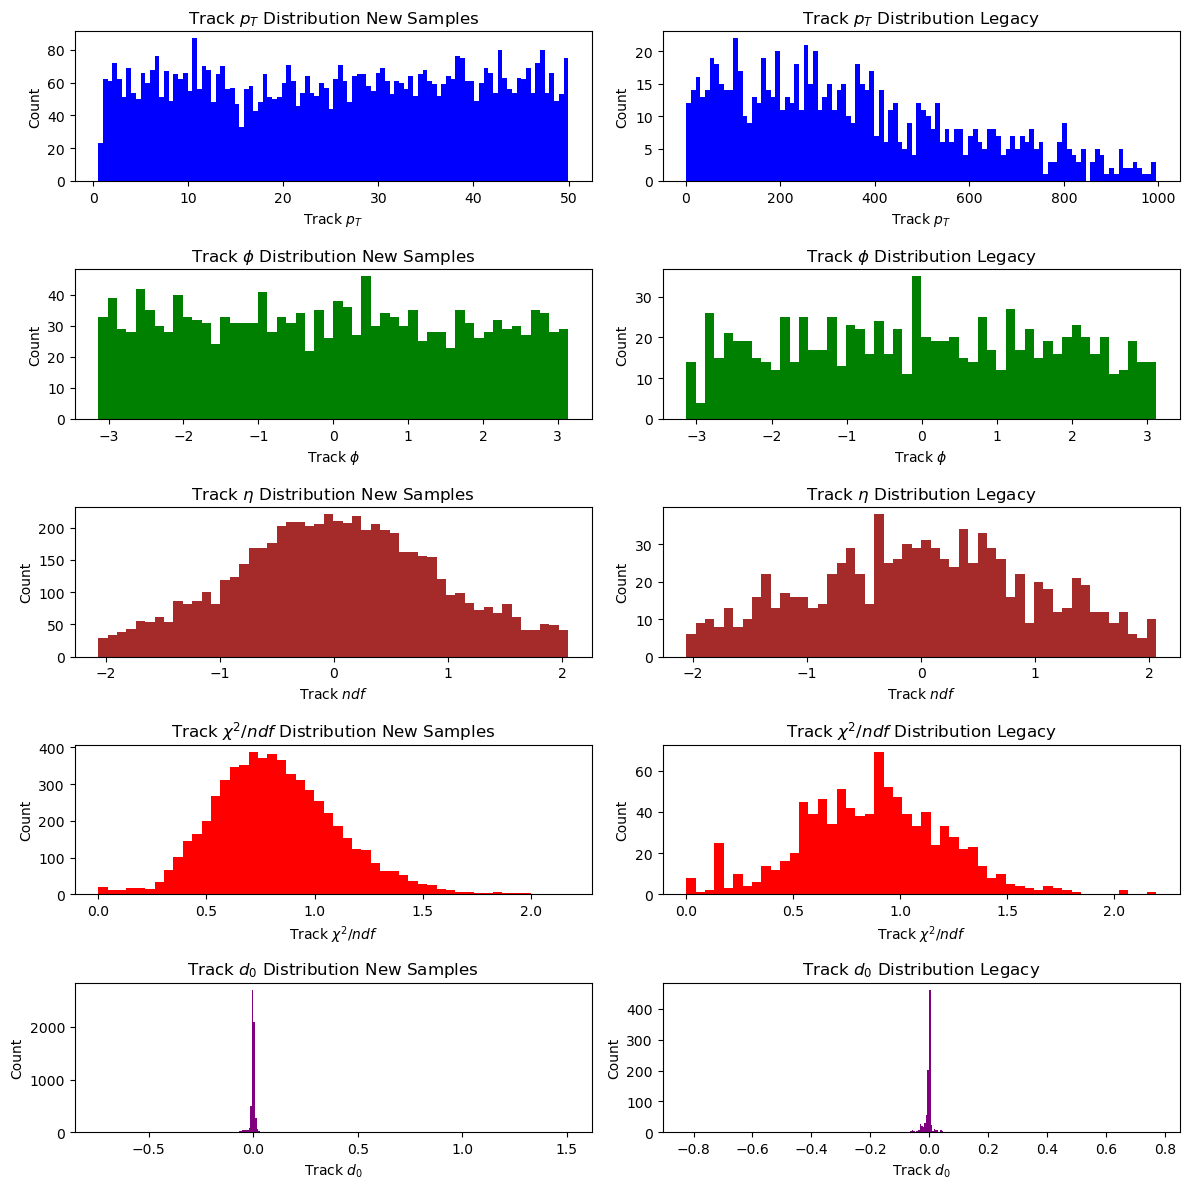

In [125]:
# Create histograms
plt.figure(figsize=(12, 12))

# Histogram for track pt
plt.subplot(5, 2, 1)
plt.hist(ak.flatten(pt_match), bins=100, color='blue')
plt.xlabel('Track $p_T$')
plt.ylabel('Count')
plt.title('Track $p_T$ Distribution New Samples')

plt.subplot(5, 2, 2)
plt.hist(ak.flatten(data['pt_match']), bins=100, color='blue')
plt.xlabel('Track $p_T$')
plt.ylabel('Count')
plt.title('Track $p_T$ Distribution Legacy')

# Histogram for track phi
plt.subplot(5, 2, 3)
plt.hist(ak.flatten(mcp_mu_match_phi), bins=50, color='green')
plt.xlabel(r'Track $\phi$')
plt.ylabel('Count')
plt.title(r'Track $\phi$ Distribution New Samples')

plt.subplot(5, 2, 4)
plt.hist(ak.flatten(data['mcp_mu_match_phi']), bins=50, color='green')
plt.xlabel(r'Track $\phi$')
plt.ylabel('Count')
plt.title(r'Track $\phi$ Distribution Legacy')

# Histogram for track eta
plt.subplot(5, 2, 5)
plt.hist(ak.flatten(eta_match), bins=50, color='brown')
plt.xlabel('Track $ndf$')
plt.ylabel('Count')
plt.title(r'Track $\eta$ Distribution New Samples')

plt.subplot(5, 2, 6)
plt.hist(ak.flatten(data['eta_match']), bins=50, color='brown')
plt.xlabel('Track $ndf$')
plt.ylabel('Count')
plt.title(r'Track $\eta$ Distribution Legacy')

# Histogram for track ndf
plt.subplot(5, 2, 7)
plt.hist(ak.flatten(chi2)/ak.flatten(ndf), bins=50, color='red')
plt.xlabel(r'Track $\chi^2/ndf$')
plt.ylabel('Count')
plt.title(r'Track $\chi^2/ndf$ Distribution New Samples')

plt.subplot(5, 2, 8)
plt.hist(ak.flatten(data['chi2'])/ak.flatten(data['ndf']), bins=50, color='red')
plt.xlabel(r'Track $\chi^2/ndf$')
plt.ylabel('Count')
plt.title(r'Track $\chi^2/ndf$ Distribution Legacy')

# Histogram for track d0
plt.subplot(5, 2, 9)
plt.hist(ak.flatten(d0_res_match), bins=300, color='purple')
plt.xlabel('Track $d_0$')
plt.ylabel('Count')
plt.title(r'Track $d_0$ Distribution New Samples')
#plt.xlim(-0.1, 0.1)

plt.subplot(5, 2, 10)
plt.hist(ak.flatten(data['d0_res_match']), bins=300, color='purple')
plt.xlabel('Track $d_0$')
plt.ylabel('Count')
plt.title('Track $d_0$ Distribution Legacy')
#plt.xlim(-0.1, 0.1)

# Adjust subplot spacing
plt.tight_layout()

# Display the histograms
plt.show()


Text(0.5, 1.0, 'Track nhits Distribution New Samples')

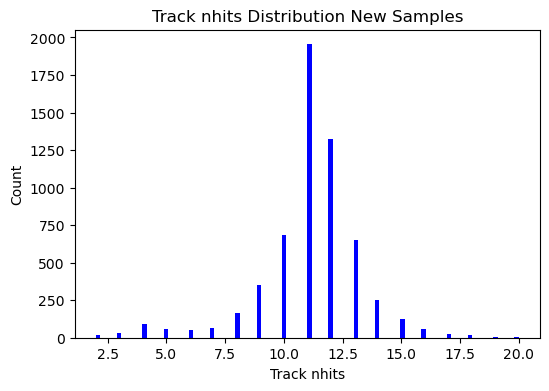

In [128]:
plt.figure(figsize=(6, 4))

plt.hist(ak.flatten(nhits), bins=100, color='blue')
plt.xlabel('Track nhits')
plt.ylabel('Count')
plt.title('Track nhits Distribution New Samples')

### Binning impact parameters by $p_T$

In [89]:
pT_ranges = [1,100, 500, np.inf]  # The last value should be np.inf to cover 200+ GeV

# Define relaxed cutoffs for lower pT ranges
pT_d0_cutoffs = [0.8, 0.7, 0.6, 0.5]  # Example: 1-5 GeV, 5-50 GeV, 50-200 GeV
pT_z0_cutoffs = [1.8, 1.7, 1.6, 1.5]  # Example: 1-5 GeV, 5-50 GeV, 50-200 GeV

# Initialize the target arrays with NaN values to preserve the dtype
d0_masked = []
z0_masked = []
pt_res_masked = []
pt_masked_d0 = []
pt_masked_z0 = []
theta_masked_d0 = []
theta_masked_z0 = []

# Create subsets of data for different pT ranges and apply resolution cutoffs
for i in range(len(pT_ranges) - 1):
    pT_min = pT_ranges[i]
    pT_max = pT_ranges[i + 1]

    # Create a mask for the current pT range
    mask = np.array([pT_min <= x[0] < pT_max for x in pt_match])  

    # Apply resolution cutoffs for d0 and z0
    d0_cutoff = np.array([x[0] < pT_d0_cutoffs[i] for x in d0_res_match])
    z0_cutoff = np.array([x[0] < pT_z0_cutoffs[i] for x in z0_res_match])
    theta_cutoff = np.array([70 <= x[0] < 110 for x in theta_match])
    d0_mask = mask & d0_cutoff & theta_cutoff
    z0_mask = mask & z0_cutoff & theta_cutoff
    # Create subsets of data for the current pT range and apply the resolution cutoffs
    #pT_subset = pt_match[mask]
    d0_masked.append(d0_res_match[d0_mask])
    z0_masked.append(z0_res_match[z0_mask])
    dpT_pt = []
    for x, y in zip(pt_res[d0_mask], pt_match[d0_mask]):
        dpT_pt.append([x[0] / y[0]])
    pt_res_masked.append(dpT_pt)  
    pt_masked_d0.append(pt_match[d0_mask])
    pt_masked_z0.append(pt_match[z0_mask])
    theta_masked_d0.append(theta_match[d0_mask])
    theta_masked_z0.append(theta_match[z0_mask])
    print('# of points in pT range', pT_min, '-', pT_max, '=', len(theta_match[d0_mask]))
print(pt_res_masked)
print(theta_masked_d0)
# print(len(d0_masked))
# print(len(theta_masked_d0))
# for i in range(len(d0_masked)):
#     print(len(d0_masked[i]))
#     print(len(theta_masked_d0[i]))

# of points in pT range 1 - 100 = 1783
# of points in pT range 100 - 500 = 0
# of points in pT range 500 - inf = 0
[[[0.009132149438936173], [0.15867606807790033], [0.06730937954805694], [0.006877572282068575], [0.032680101881292806], [0.007875471299138383], [0.009165879111990485], [0.00721580008993018], [0.015052569596500281], [0.006057626141824398], [0.008771449446269296], [0.013407274117684624], [0.011112923689672358], [0.0065277896977345646], [-0.008969515470213192], [0.026370867698576456], [0.022038089943180128], [0.014909443661764256], [0.02807616187929399], [0.014133836851218698], [0.009430608347211437], [0.009534168071293096], [0.02649983511785827], [0.006302949899695792], [0.0075425826452412935], [0.024876173111743585], [0.008506135542372156], [0.007599323497987383], [0.007666897673199404], [0.05411732232246634], [0.009794312376275866], [0.007361312648486558], [0.02662480518606109], [0.01543561317364931], [0.009601119752466459], [0.012440900486074699], [0.13581653679478037], [

### Plotting Functions

In [107]:
# Function for creating a Gaussian fit
def gaussian(x, a, mu, sigma):
    return a * np.exp(-0.5 * ((x - mu) / sigma)**2)

def fit_gaussian(slice_data, bins=np.linspace(-0.5, 0.5, 100), mean = 0, rms = 0.01):
    if mean is None:
        rms = np.mean(slice_data)
    if mean is None:
        rms = np.sqrt(np.mean(np.square(slice_data - mean)))
    counts, bin_edges = np.histogram(slice_data, bins=bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    popt, pcov = curve_fit(gaussian, bin_centers, counts, p0=[max(counts), mean, rms])
    return popt, pcov, bin_centers

##############################################################################################################################################################################################################################
# Function for plotting RMS vs. eta/theta/pT for multiple pT bins

def plotrms_multi(datax, datay, bins, labels=None, xlabel = '', ylabel='', title=''):
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(111)
    
    for j in range(len(datay)):
        data_flatx = np.array(np.ravel(datax[j])).T
        data_flaty = np.array(np.ravel(datay[j])).T
        x_bins = np.linspace(data_flatx.min(), data_flatx.max(), bins + 1)
        rms_values = []
        sem_values = []
        for i in range(bins):
            slice_data = data_flaty[(data_flatx >= x_bins[i]) & (data_flatx < x_bins[i + 1])]
            try:
                # Fit a Gaussian to the slice data using the fit_gaussian function
                popt, pcov, bin_centers = fit_gaussian(slice_data)
                fitted_mean = popt[1]
                fitted_rms = popt[2]
            except RuntimeError:
                print(f"Could not fit Gaussian for Slice {i}.")
                rms = np.sqrt(np.mean(np.square(slice_data - np.mean(slice_data))))
                rms_values.append(rms)
                #sem_values.append(np.std(x_bin_data, ddof=1) / np.sqrt(len(x_bin_data)))
                continue            
            # sem = np.std(slice_data, ddof=1) / np.sqrt(len(slice_data))
            # if np.isnan(sem) or sem == 0:
            #     continue  # Skip bins with zero or NaN standard deviation
            rms_values.append(fitted_rms)
            #sem_values.append(sem)

        ax.errorbar((x_bins[:-1] + x_bins[1:]) / 2, rms_values, xerr = (data_flatx.max()-data_flatx.min())/(2*bins), fmt='o', markersize=4, label=labels[j])#, linestyle='-')
        #ax.scatter((x_bins[:-1] + x_bins[1:]) / 2, rms_values, label=labels[j])#, linestyle='-')
    # title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    # xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]     
    # ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2] 
    ax.set_title(title)
    ax.set_xlabel(xlabel)#, fontsize=8)
    ax.set_ylabel(ylabel)#, fontsize=8)
    ax.set_yscale('log')
    ax.legend()
    plt.show()

##############################################################################################################################################################################################################################
# Function for plotting RMS vs. eta/theta/pT

def plotrms(datax, datay, bins, label="", xlim=None, ylim=None):
    data_flatx = np.array(np.ravel(datax)).T
    data_flaty = np.array(np.ravel(datay)).T
    
    if xlim is not None:
        x_bins = np.linspace(xlim[0], xlim[1], bins + 1)
    else:
        x_bins = np.linspace(data_flatx.min(), data_flatx.max(), bins + 1)
    
    rms_values = []
    sem_values = []
    
    for i in range(bins):
        # Select data points within the specified x slice
        slice_data = data_flaty[(data_flatx >= x_bins[i]) & (data_flatx < x_bins[i + 1])]
        #print("Bin", i, "has", len(slice_data), "data points")
        try:
            popt, pcov, bin_centers = fit_gaussian(slice_data)
            fitted_mean = popt[1]
            fitted_rms = popt[2]
            sem_values.append(np.sqrt(pcov[2, 2]))
            rms_values.append(fitted_rms)
        except RuntimeError:
            print(f"Could not fit Gaussian for Slice {i}.")
            rms_values.append(np.sqrt(np.mean(np.square(slice_data - np.mean(slice_data)))))
            sem_values.append(np.std(slice_data, ddof=1) / np.sqrt(len(slice_data)))
            continue
        
        #print(f"Iteration {i}, rms_values size: {len(rms_values)}, sem_values size: {len(sem_values)}")

    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(111)

    ax.errorbar((x_bins[:-1] + x_bins[1:]) / 2, rms_values, yerr = sem_values, xerr = (data_flatx.max()-data_flatx.min())/(2*bins), color = 'darkblue', fmt='o', markersize=4)#, linestyle='-')
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]     
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2] 
    ax.set_title(title)
    ax.set_xlabel(xlabel)#, fontsize=8)
    ax.set_ylabel(ylabel)#, fontsize=8)
    ax.set_yscale('log')
    if ylim is not None:
            ax.set_ylim(ylim[0], ylim[1])
    plt.show()

##############################################################################################################################################################################################################################
# Function for plotting a 1D histogram and fitting a Gaussian to it

def plotrms_slice(datax, datay, x_bins, bins, title=""):
    data_flatx = np.array(np.ravel(datax)).T
    data_flaty = np.array(np.ravel(datay)).T

    for i in range(len(x_bins)-1):
        # Select data points within the specified x slice
        slice_data = data_flaty[(data_flatx >= x_bins[i]) & (data_flatx < x_bins[i + 1])]
        gaussian_fit = True
        try:
            # Fit a Gaussian to the slice data using the fit_gaussian function
            popt, pcov, bin_centers = fit_gaussian(slice_data, bins)
            fitted_mean = popt[1]
            fitted_rms = popt[2]
        except RuntimeError:
            print(f"Could not fit Gaussian for Slice {i}.")
            gaussian_fit = False
            continue

        # Print the values
        print(f"Slice {i}:", x_bins[i], 'to', x_bins[i + 1])
        #print("Actual Mean:", actual_mean)
        print("Mean from Fit:", fitted_mean)
        #print("Actual RMS:", actual_rms)
        print("Sigma from Fit:", fitted_rms)
        print("------------------------------------")

        # Plot the 1D histogram with the Gaussian fit
        plt.hist(slice_data, bins, alpha=0.5, label=f'Slice {i}')
        if gaussian_fit:
            plt.plot(bin_centers, gaussian(bin_centers, *popt), 'r--', label='Gaussian Fit')
        plt.xlabel('Data')
        plt.ylabel('Counts')
        plt.title(title+ f' for Slice {i}')
        plt.legend()
        plt.show()
        return fitted_rms

##############################################################################################################################################################################################################################
# 2D Histogram plotting function

def plot2DHistogram(datax, datay, bins=100, norm="log", label="", xlim = None, ylim = None, stats = True):
    
    data_flatx = np.array(np.ravel(datax)).T
    data_flaty = np.array(np.ravel(datay)).T
    #print(len(data_flatx),data_flatx)
    #print(len(data_flaty),data_flaty)
    
    fig = plt.figure(figsize=(4.5,3))
    ax = fig.add_subplot(111)

    hh = ax.hist2d(data_flatx, data_flaty, bins=bins, norm=norm, cmap="viridis")
    
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2]  
    zlabel = "" if len(label.split(";")) < 4 else label.split(";")[3] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)#, fontsize=8)
    ax.set_ylabel(ylabel)#, fontsize=8)
    if xlim is not None:
        ax.set_xlim(xlim[0], xlim[1])
    if ylim is not None:
        ax.set_ylim(ylim[0], ylim[1])

    if stats == True:
        # Calculate statistics
        num_entries = len(data_flatx)
        mean_x = np.mean(data_flatx)
        mean_y = np.mean(data_flaty)
        std_x = np.std(data_flatx)
        std_y = np.std(data_flaty)
        # Calculate FWHM of datay
        #fwhm_value = fwhm(data_flaty, bins = np.linspace(np.min(data_flaty), np.max(data_flaty), bins[1]))
        
        # Create a text box to display statistics
        # stats_text = 'FWHM '+ylabel+f':{fwhm_value:.3f}'#"Entries: {num_entries}\nMean x: {mean_x:.2f}\nMean y: {mean_y:.2f}\nStd Dev x: {std_x:.2f}\nStd Dev y: {std_y:.2f}"
        # ax.text(0.5, 0.98, stats_text, transform=ax.transAxes, va='top', ha='left', bbox=dict(boxstyle='round, pad=0.5', facecolor='white', alpha=0.8), fontsize = 7)

    # colorbars are annoying
    cbar = fig.colorbar(hh[3])
    #cbar.ax.tick_params(labelsize=tick_font_size)
    cbar.set_label(zlabel)#, fontsize=6)

    plt.show()

##############################################################################################################################################################################################################################
# 1D Histogram comparison function
colors = []
def compare1DHistograms(datas,bins,scale='linear',label="",leg=[]):

    fig = plt.figure(figsize=(5,4))
    ax = fig.add_subplot(111)
    
    for i,data in enumerate(datas): 

        # handle data, there must be a smarter way to do this...
        if type(data[0])==np.int64   : data_flat=data
        elif type(data[0])==np.float32 : data_flat=data
        else : data_flat = ak.flatten(data, axis=None)
            
        ax.hist(data_flat, bins, alpha=0.5, label=leg[i] if len(leg)>i else "")
   
    # handle labels
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    plt.legend()
    plt.yscale(scale)
    plt.show()

### Make 1D Histograms and Compute The RMS (also checking to see whether the fitted Gaussian matches expectations)

c:\Users\leoro\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Could not fit Gaussian for Slice 4.
Could not fit Gaussian for Slice 7.


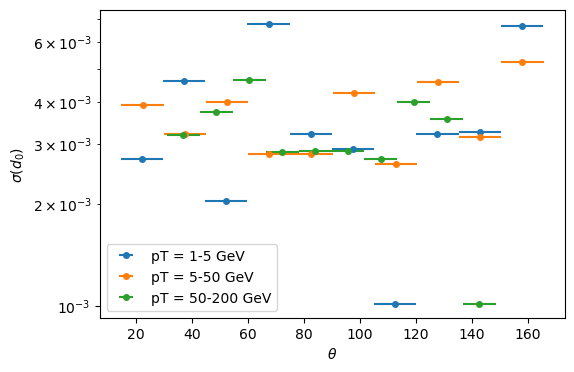

In [11]:
plotrms_multi(theta_masked_d0,d0_masked, bins = 10, labels = ['pT = 1-5 GeV', 'pT = 5-50 GeV', 'pT = 50-200 GeV', 'pT = 200+ GeV'], xlabel = r'$\theta$', ylabel = r'$\sigma(d_0)$ ', title = '')

Slice 0: 0 to 50
Mean from Fit: 0.28809277393425625
Sigma from Fit: 0.004760626761683662
------------------------------------


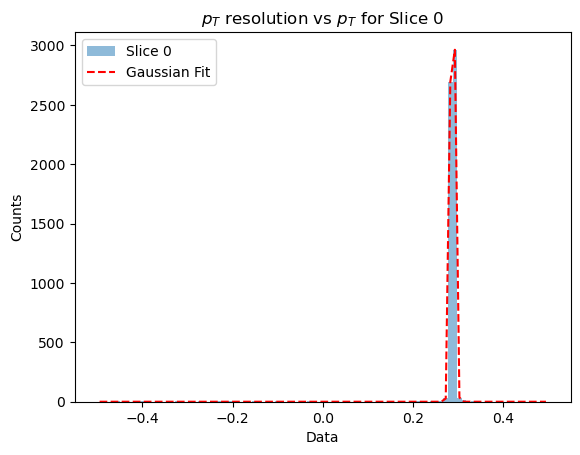

In [129]:
d0_bins = np.linspace(-0.1, 0.1, 300)
pT_bins = np.linspace(-0.5, 0.5, 100)
eta_bins = np.linspace(-2.7, 2.7, 100)
chi2ndf_bins = np.linspace(0, 2, 100)
nhits_bins = np.linspace(0, 20, 100)
x_bins = np.array([0,50])
d0_title = r'$d_0$ resolution vs $p_T$'
pT_title = r'$p_T$ resolution vs $p_T$'
sigma = plotrms_slice(pt_match, pt_res, x_bins = x_bins, bins=pT_bins, title=pT_title)

### Comparing Bulk vs Tails 

In [119]:

spread = 5*sigma
pt_bulk = np.array([-1*spread+x[0] <= x[0] < spread+x[0] for x in pt_res]) 
pt_tails = np.array([x[0] < -1*spread+x[0] or x[0] >= spread-x[0] for x in pt_res])
d0_bulk = np.array([-1*spread <= x[0] < spread for x in d0_res_match])
d0_tails = np.array([x[0] < -1*spread or x[0] >= spread for x in d0_res_match])

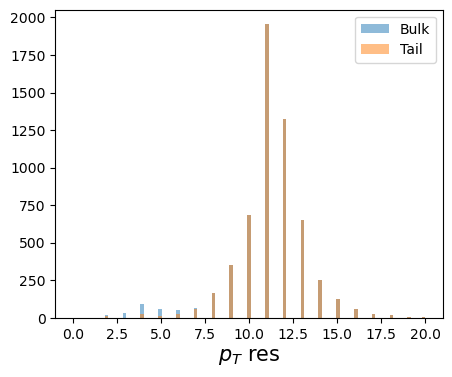

In [131]:
legends= ["Bulk", "Tail"]
arrays = [(nhits)[pt_bulk], (nhits)[pt_tails]]
compare1DHistograms(arrays, bins = nhits_bins, leg = legends, label = ';$p_T$ res')

### Plot 2D Hists showing resolution against $p_T$/$\eta$ and then the RMS of them against $\eta$

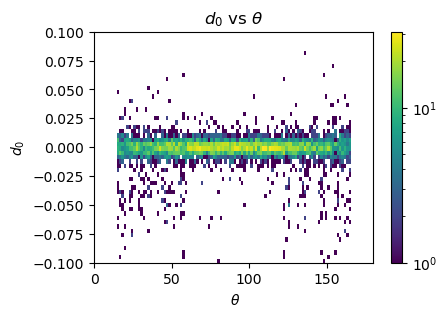

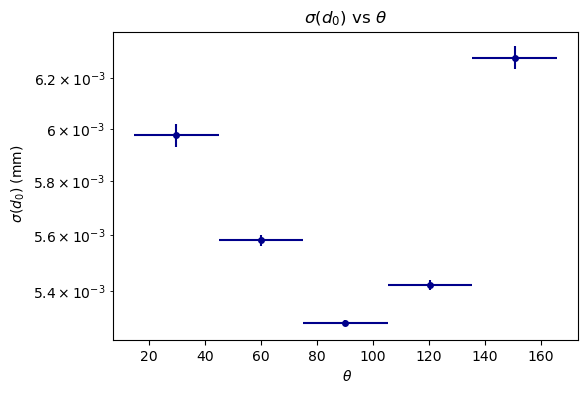

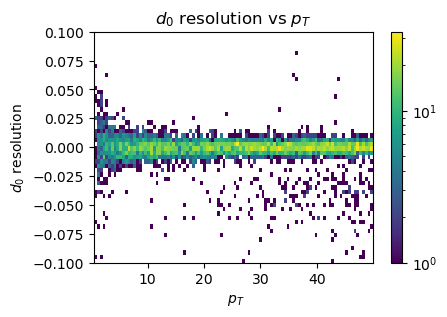

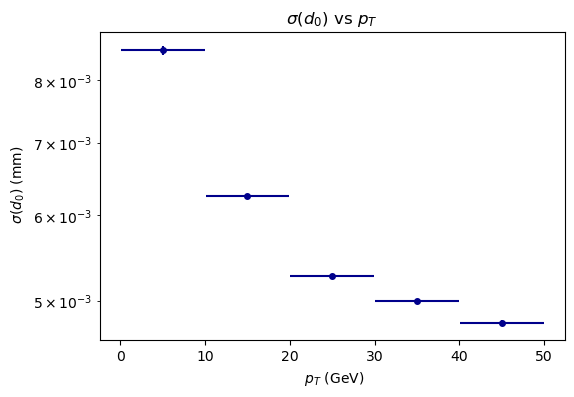

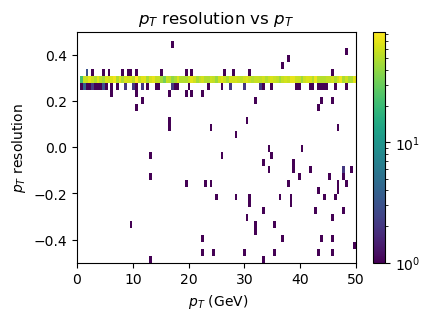

c:\Users\leoro\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Could not fit Gaussian for Slice 1.


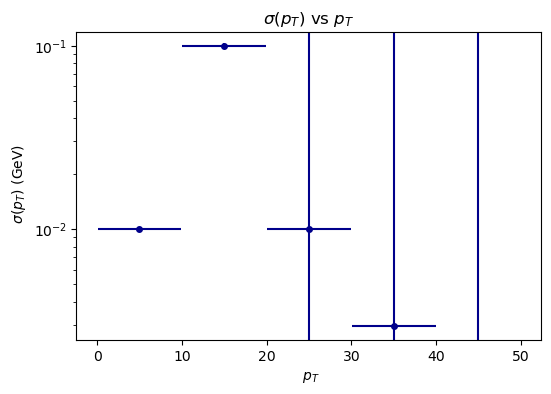

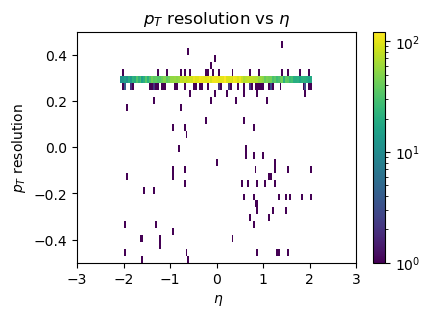

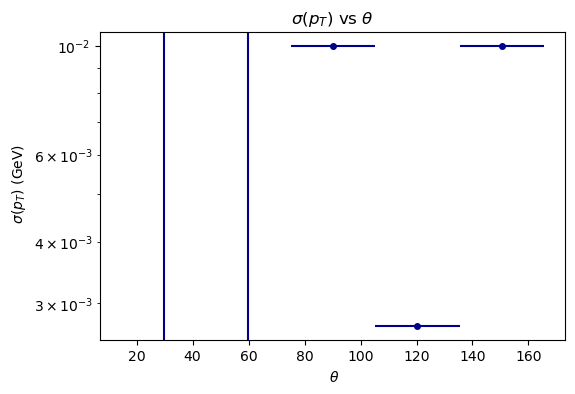

In [102]:
# # Histogram for mcp_eta
# plt.figure(figsize=(6, 3))

# plt.subplot(1, 2, 1)
# plt.hist((mcp_eta), bins=50, color='green')
# plt.xlabel('MCP $\\eta$')
# plt.ylabel('Count')
# plt.title('MCP $\\eta$ Distribution')

# # Histogram for mcp_phi
# plt.subplot(1, 2, 2)
# plt.hist((mcp_phi), bins=50, color='red')
# plt.xlabel('MCP $\\phi$')
# plt.ylabel('Count')
# plt.title('MCP $\\phi$ Distribution')

# # Adjust subplot spacing
# plt.tight_layout()

pt_xlim = [0, 50]
rms_bins = 5
plot2DHistogram(theta_match, d0_res_match, bins=(100,600), label=r"$d_0$ vs $\theta$; $\theta$;$d_0$", xlim = (0,180), ylim = (-0.1,0.1))
plotrms(theta_match, d0_res_match, bins=rms_bins, label=r"$\sigma(d_0)$ vs $\theta$; $\theta$; $\sigma(d_0)$ (mm)")
plot2DHistogram(pt_match, d0_res_match, bins=(100,600), label=r"$d_0$ resolution vs $p_T$; $p_T$;$d_0$ resolution", ylim = (-0.1,0.1))#, xlim = (0,1000), ylim = (-0.1,0.1))
plotrms(pt_match, d0_res_match, bins=rms_bins, label=r"$\sigma(d_0)$ vs $p_T$; $p_T$ (GeV); $\sigma(d_0)$ (mm)", xlim = pt_xlim)
# plot2DHistogram(eta_match, z0_res_match, bins=(100,1000), label=r"$z_0$ resolution vs $\eta$; $\eta$;$z_0$ resolution", xlim = (-3,3), ylim = (-0.1,0.1))
# plotrms(eta_match, z0_res_match, bins=rms_bins, label=r"$\sigma(z_0)$ vs $\eta$; $\eta$; $\sigma(z_0)$")
# plot2DHistogram(pt_match, z0_res_match, bins=(100,1000), label=r"$z_0$ resolution vs $p_T$; $p_T$;$z_0$ resolution", xlim = pt_xlim, ylim = (-0.1,0.1))
# plotrms(pt_match, z0_res_match, bins=rms_bins, label=r"$\sigma(z_0)$ vs $p_T$; $p_T$; $\sigma(z_0)$", xlim = pt_xlim)
plot2DHistogram(pt_match, pt_res, bins=(100,15000), label=r"$p_T$ resolution vs $p_T$; $p_T$ (GeV);$p_T$ resolution", xlim = pt_xlim, ylim = (-0.5,0.5))
plotrms(pt_match, pt_res, bins=rms_bins, label=r"$\sigma(p_T)$ vs $p_T$; $p_T$; $\sigma(p_T)$ (GeV)", xlim = pt_xlim)
plot2DHistogram(eta_match, pt_res, bins=(100,15000), label=r"$p_T$ resolution vs $\eta$; $\eta$;$p_T$ resolution", xlim = (-3,3), ylim = (-0.5,0.5))
plotrms(theta_match, pt_res, bins=rms_bins, label=r"$\sigma(p_T)$ vs $\theta$; $\theta$; $\sigma(p_T)$ (GeV)")


Text(0.5, 1.0, 'Track $p_T$ Resolution')

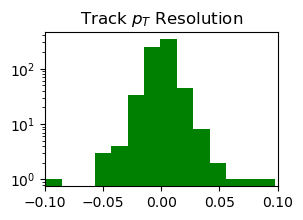

In [139]:
plt.figure(figsize=(3, 2))

plt.hist((np.ravel(pt_res)), bins=10000, color='green')
plt.yscale('log')
plt.xlim(-0.1,0.1)
plt.title('Track $p_T$ Resolution')